In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3Dグラフを作成するには、add_subplot()の引数であるprojectionで3dを指定します。これにより、Axes3Dクラスが作成され、Axes3Dクラスからそれぞれの3Dグラフに対応する描画関数を使用します。

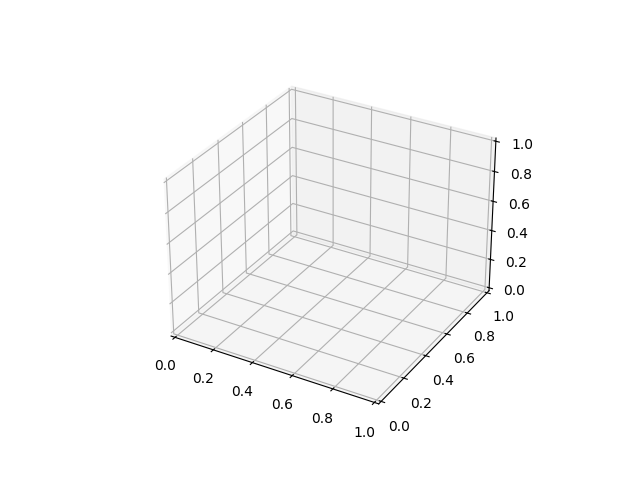

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

3D折れ線グラフを作成するには、plot()を使用する。
引数にはx座標、y座標、z座標を与える。
x座標 に(0, 1, 2, 3, 4)
y座標 に (1, 2, 3, 4, 5)
z座標 に(2, 3, 4, 5, 6)
を与えれば、
(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6)
にプロットされ、その点を繋げることで3D折れ線グラフが作られます。



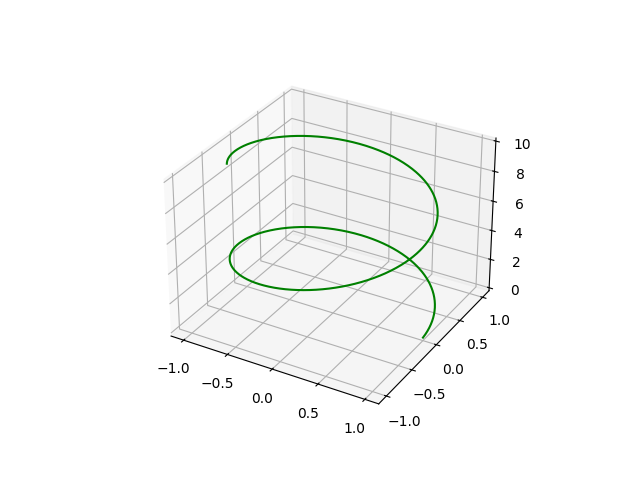

In [19]:
z = np.arange(0, 10, 0.01)
x = np.cos(z)
y = np.sin(z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(x, y, z, color='green')

plt.show()

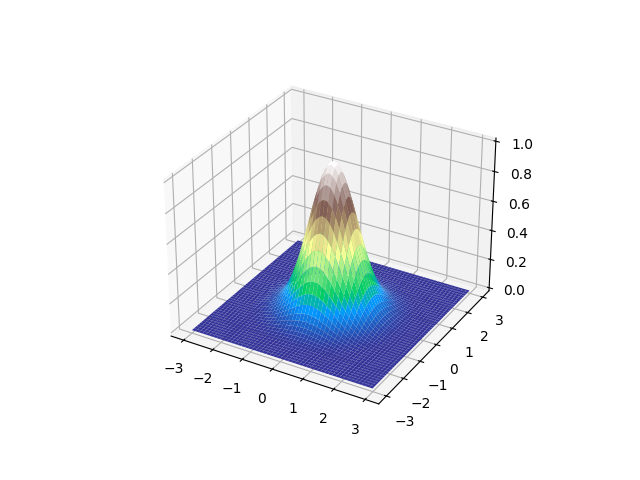

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)

z = np.exp(-(X**2 + Y**2))

ax.plot_surface(X,Y,z, cmap='terrain')
plt.show()

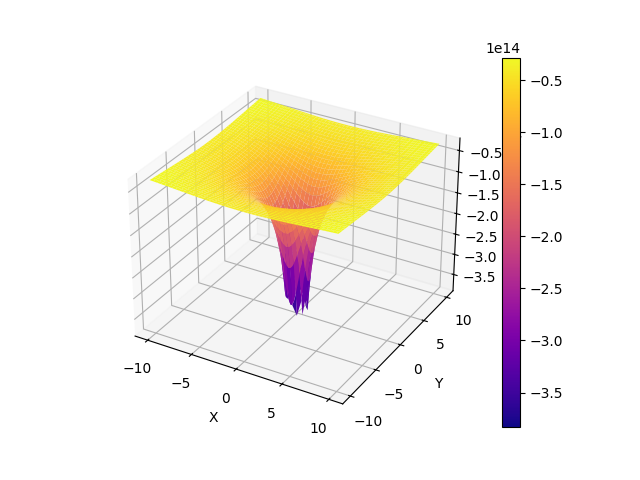

In [21]:
%matplotlib ipympl

# 定数の設定
G = 6.67430e-11  # 万有引力定数 (m^3 kg^-1 s^-2)
M = 5.972e24     # 中心にある重力源（地球）の質量 (kg)
m = 1.0          # 質点の質量 (kg)

# xy平面の座標範囲を設定
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# 中心からの距離 r を計算 (r = sqrt(x^2 + y^2))
r = np.sqrt(X**2 + Y**2)

# 半径 r が小さすぎる領域をカットする (例えば r > 1 に限定)
r_cutoff = 1.0
r[r < r_cutoff] = np.nan  # r が 1 未満の場所は描画しない

# 位置エネルギーを計算 (U = -GMm / r)
Z = -G * M * m / r

# グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3Dサーフェスプロット
surf = ax.plot_surface(X, Y, Z, cmap='plasma')

# カラーバーの追加
fig.colorbar(surf)

# ラベルの追加
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential Energy (U)')

# グラフ表示
plt.show()

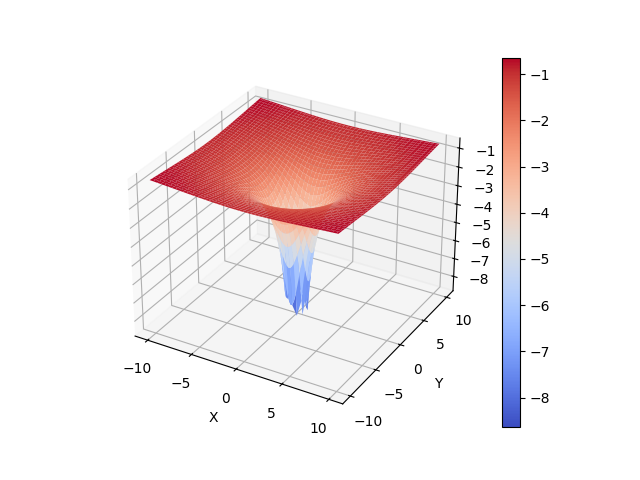

In [22]:
%matplotlib ipympl

# 定数の設定
epsilon_0 = 8.854187817e-12  # 真空の誘電率 (F/m)
Q = -1.0e-9  # 点電荷の電荷量 (C) 負の点電荷を仮定

# xy平面の座標範囲を設定
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# 中心からの距離 r を計算 (r = sqrt(x^2 + y^2))
r = np.sqrt(X**2 + Y**2)

# 半径 r が小さすぎる領域をカットする (例えば r > 1 に限定)
r_cutoff = 1.0
r[r < r_cutoff] = np.nan  # r が 1 未満の場所は描画しない

# 電位 V を計算 (V = (1 / 4πε_0) * Q / r)
V = (1 / (4 * np.pi * epsilon_0)) * Q / r

# グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3Dサーフェスプロット
surf = ax.plot_surface(X, Y, V, cmap='coolwarm')

# カラーバーの追加
fig.colorbar(surf)

# ラベルの追加
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Electric Potential (V)')

# グラフ表示
plt.show()


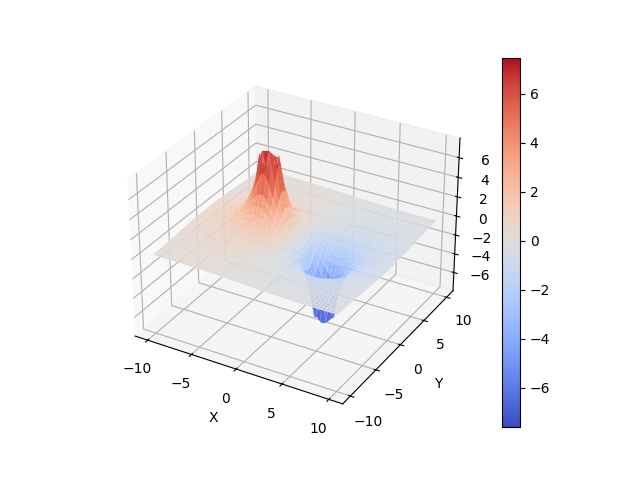

In [23]:
%matplotlib ipympl


# 定数の設定
epsilon_0 = 8.854187817e-12  # 真空の誘電率 (F/m)
Q = 1.0e-9   # 正の点電荷の電荷量 (C)
Q_neg = -1.0e-9  # 負の点電荷の電荷量 (C)
x0 = 3.0     # 負の点電荷の位置 (x = 5)

# xy平面の座標範囲を設定
x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)

# 2つの点電荷からの距離 r1 (正のQ) と r2 (負の-Q) を計算
r1 = np.sqrt((X + x0)**2 + Y**2)         # 原点にある正の点電荷 Q からの距離
r2 = np.sqrt((X - x0)**2 + Y**2)  # x0 (x = 5) にある負の点電荷 -Q からの距離

# 半径 r が小さすぎる領域をカットする (例えば r > 1 に限定)
r_cutoff = 1.0
r1[r1 < r_cutoff] = np.nan  # r1 が 1 未満の場所は描画しない
r2[r2 < r_cutoff] = np.nan  # r2 が 1 未満の場所は描画しない

# 電位 V1 (正のQからの電位) と V2 (負のQからの電位) を計算
V1 = (1 / (4 * np.pi * epsilon_0)) * Q / r1
V2 = (1 / (4 * np.pi * epsilon_0)) * Q_neg / r2

# 合成電位 V = V1 + V2
V = V1 + V2

# グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3Dサーフェスプロット
surf = ax.plot_surface(X, Y, V, cmap='coolwarm')

# カラーバーの追加
fig.colorbar(surf)

# ラベルの追加
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Electric Potential (V)')

# グラフ表示
plt.show()
